<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Charulata_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


To understand how the data structure looks like:




In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#for numerical variables:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#for categorical variables:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Lets visulaize the entire dataset:


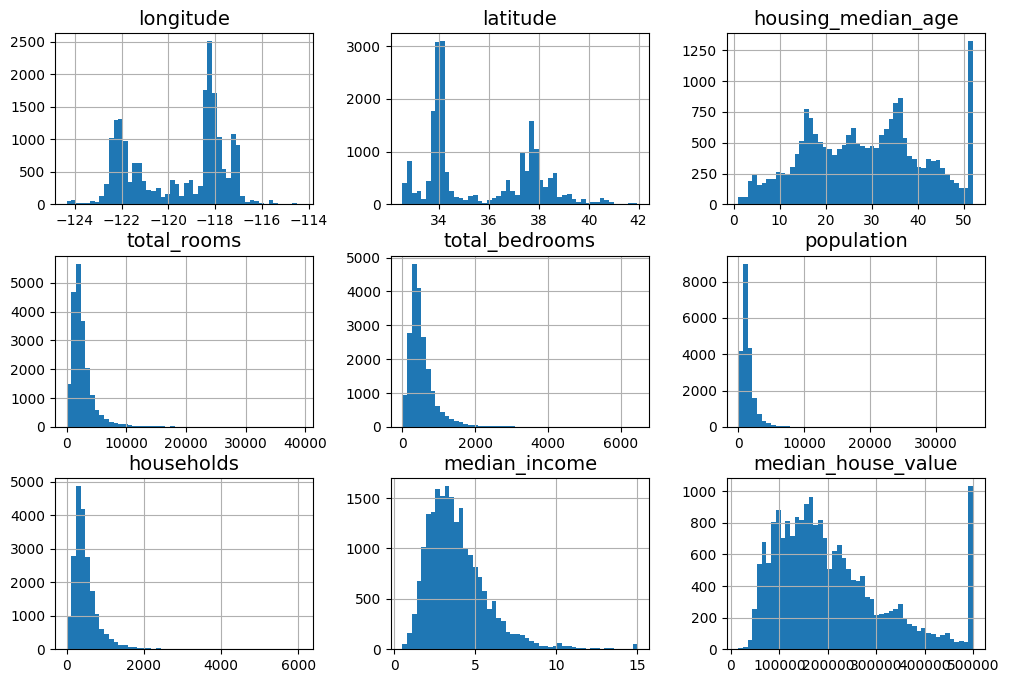

In [8]:
import matplotlib.pyplot as plt

#This is a hitogram for each numerical attribute:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Observations:
1. Many histograms are skewed right. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, we will try transforming these attributes to have more symmetrical and bell-shaped distributions.
2. The median income attribute does not look like it is expressed in US dollars
(USD), it is actually capped at 15 (actually, 15.0001) for higher median
incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000).
3. Housing median age and the median house value are also capped.

**Creating a test set: **

In [9]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)
#RangeIndex: 20640 entries, 0 to 20639

16512

In [11]:
len(test_set)

4128

In [12]:
#To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(42)

Even after using random seed, we might not be able to acheive

**Advantages of Hash-Based Splitting:**
1. Reproducibility Across Different Runs:

Hash-based splitting ensures that the same data points consistently fall into the training and test sets across different runs, even if the data order changes.
In contrast, np.random.seed() ensures reproducibility** only if the order of data remains the same**. If the data order changes, the split will also change.

2. Consistency Across Different Systems:

Hash functions like crc32 produce the same output for the same input on any system, ensuring consistency across different environments.
np.random.seed() depends on the initial state of the random number generator, which might still lead to **slight variations across different systems or Python versions.**

3. Data Integrity:

When using a specific identifier (like an index or a combination of columns) for hashing, you can ensure that certain records always go to the same split, preserving data integrity.
This is particularly **useful for datasets with specific constraints, such as ensuring all data from the same user or session remain in the same split.**

4. Flexibility with Data Updates:

If your dataset is updated (e.g., more records are added),** hash-based splitting can easily accommodate the new records without disrupting the existing split.**
With np.random.seed(), adding new records might require recalculating the split, which could change the assignment of existing records.

5. Avoiding Randomness:

Hash-based splitting completely avoids the inherent randomness in the splitting process. This is beneficial when randomness needs to be minimized for specific applications.
np.random.seed() still introduces randomness; it's just controlled by the seed value.

In short, While np.random.seed() is useful for controlling randomness in scenarios like shuffling data or generating random numbers, hash-based splitting provides a more robust and consistent method for splitting datasets, especially when dealing with updates, changes in data order, and ensuring reproducibility across different environments.

How Hash-Based Splitting Works:

Identifier-Based Splitting:
By using an identifier (such as a unique ID, a combination of features, or an index), you ensure that the decision to include a record in the training or test set is deterministic.

The identifier is hashed, and the result is compared to the test ratio threshold to determine the split.

In [13]:
from zlib import crc32
from sklearn.model_selection import train_test_split


In [14]:
#is_id_in_test_set: This function determines if an identifier should be in the test set based on the provided test ratio. It uses the crc32 hash function to ensure consistent hashing.
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32


In [15]:
#split_data_with_id_hash: This function splits the dataset based on an identifier column and the test ratio. It applies the is_id_in_test_set function to each identifier.
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [16]:
#the dataset housing is reset to have an index column, which is then used to split the dataset into training and test sets using the split_data_with_id_hash function.
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")


In [17]:
#a new identifier id is created by combining longitude and latitude, which is then used to split the dataset.
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


In [18]:
 #train_test_split function from sklearn with a fixed random state to ensure reproducibility. The dataset housing is split into training and test sets with 20% of the data in the test set.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [20]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [22]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN
